In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import rcParams
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix, roc_curve, auc, log_loss, mean_absolute_error

In [2]:
# load data
df = pd.read_csv('../input/imdb-reviews-cleaned/imdb_reviews_cleaned.csv')
df.head()

,review,sentiment,clean_reviews,clean_reviews_str,review_word_count,review_length
0,One of the other reviewers has mentioned that ...,positive,"['one', 'reviewer', 'ha', 'mentioned', 'watchi...",one reviewer ha mentioned watching oz episode ...,168,1098
1,A wonderful little production. <br /><br />The...,positive,"['wonderful', 'little', 'production', 'filming...",wonderful little production filming technique ...,86,646
2,I thought this was a wonderful way to spend ti...,positive,"['thought', 'wa', 'wonderful', 'way', 'spend',...",thought wa wonderful way spend time hot summer...,88,583
3,Basically there's a family where a little boy ...,negative,"['basically', 'family', 'little', 'boy', 'jake...",basically family little boy jake think zombie ...,64,425
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['petter', 'matteis', 'love', 'time', 'money',...",petter matteis love time money visually stunni...,126,846


In [3]:
df['sentiment'].replace('positive', 1, inplace=True)
df['sentiment'].replace('negative', 0, inplace=True)

In [4]:
# split data
X = df['clean_reviews_str']

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# fit bag of words model to training set and transform test set

cv = CountVectorizer(min_df=0, max_df=1, ngram_range=(1,2))

X_train = cv.fit_transform(X_train)

X_test = cv.transform(X_test)

print(X_train.shape, X_test.shape)

(40000, 2022756) (10000, 2022756)


In [6]:
# create, train, and test model

logr = linear_model.LogisticRegression()

model_logr = logr.fit(X_train, y_train)

y_pred_logr = model_logr.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred_logr))

print('The accuracy score is:', accuracy_score(y_test, y_pred_logr))
print('The precision score is:', precision_score(y_test, y_pred_logr))
print('The recall score is:', recall_score(y_test, y_pred_logr))
print('The f1_score is:', f1_score(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71      4971
           1       0.74      0.54      0.63      5029

    accuracy                           0.67     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.67      0.67     10000

The accuracy score is: 0.6747
The precision score is: 0.7430213464696224
The recall score is: 0.5398687611851263
The f1_score is: 0.6253598986525394


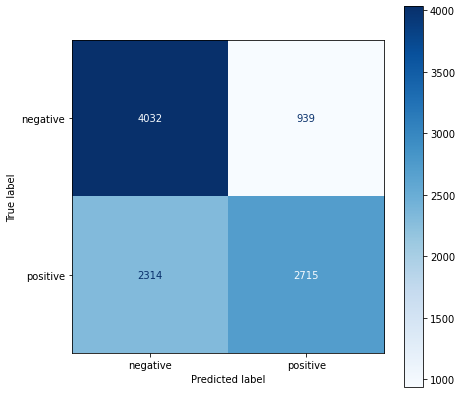

In [8]:
# create confusion matrix

rcParams['figure.figsize'] = 7,7

plot_confusion_matrix(model_logr, X_test, y_test, display_labels=['negative', 'positive'], cmap=plt.cm.Blues, normalize=None);

From the confusion matrix we can see that the model is misclassifying almost half of the positive reviews as negative. The model is not bad about misclassifying negative reviews as positive, but it is not great and improvements could be made.

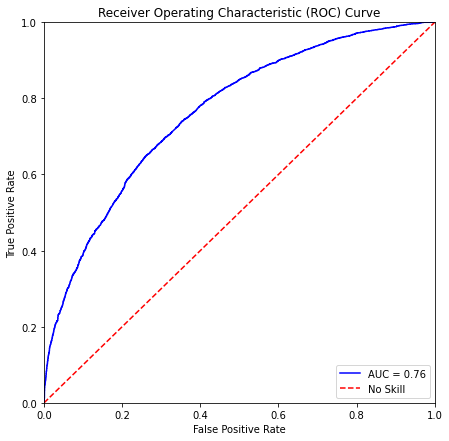

In [9]:
# plot ROC curve

probs = logr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From the ROC plot our confusion matrix is confirmed and we see that the model is halfway in between the dashed-line representing "no skill" and the upper left corner. The closer the curve is to the upper left corner the better the model performance. The area underneath the curve is 0.76, or 76%, and this is also a measure of how much predictive power the model has.

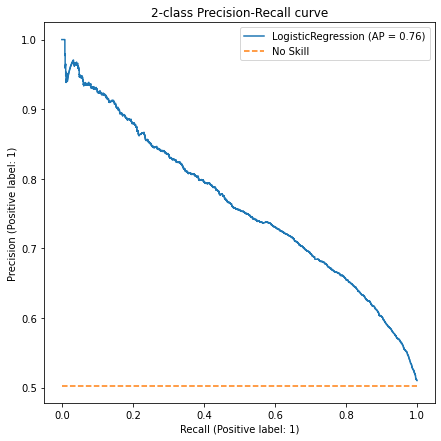

In [10]:
# plot precision-recall curve

disp = plot_precision_recall_curve(model_logr, X_test, y_test, pos_label=1)
no_skill = len(y_test[y_test==1]) / len(y_test)
disp.ax_.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
disp.ax_.legend(loc=1)
disp.ax_.set_title('2-class Precision-Recall curve');

From the precision recall curve it can be seen that almost everywhere along the plot as precision decreases recall increases. There is rarely any instances where precision stays the same as recall increases.

training error: 0.0 test error: 0.503 subset size: 20
training error: 0.0 test error: 0.503 subset size: 29
training error: 0.0 test error: 0.497 subset size: 44
training error: 0.0 test error: 0.497 subset size: 66
training error: 0.0 test error: 0.496 subset size: 99
training error: 0.0 test error: 0.497 subset size: 148
training error: 0.009 test error: 0.497 subset size: 221
training error: 0.012 test error: 0.493 subset size: 329
training error: 0.012 test error: 0.493 subset size: 492
training error: 0.01 test error: 0.49 subset size: 733
training error: 0.011 test error: 0.485 subset size: 1094
training error: 0.009 test error: 0.481 subset size: 1632
training error: 0.006 test error: 0.475 subset size: 2435
training error: 0.006 test error: 0.464 subset size: 3632
training error: 0.006 test error: 0.463 subset size: 5418
training error: 0.005 test error: 0.447 subset size: 8081
training error: 0.005 test error: 0.42 subset size: 12054
training error: 0.005 test error: 0.392 sub

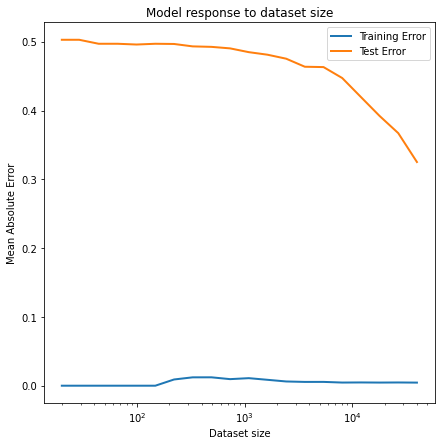

In [12]:
def data_size_response(model,trX,teX,trY,teY,score_func,prob=True,n_subsets=20):

    train_errs,test_errs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)

    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        if prob:
            train_err = score_func(trY[:m],model.predict(trX[:m]))
            test_err = score_func(teY,model.predict(teX))
        else:
            train_err = score_func(trY[:m],model.predict(trX[:m]))
            test_err = score_func(teY,model.predict(teX))
        print("training error: {} test error: {} subset size: {}".format(round(train_err, 3), round(test_err, 3), round(m, 3)))
        train_errs.append(train_err)
        test_errs.append(test_err)

    return subset_sizes, train_errs, test_errs

def plot_response(subset_sizes,train_errs,test_errs):

    plt.plot(subset_sizes,train_errs,lw=2)
    plt.plot(subset_sizes,test_errs,lw=2)
    plt.legend(['Training Error','Test Error'])
    plt.xscale('log')
    plt.xlabel('Dataset size')
    plt.ylabel('Mean Absolute Error')
    plt.title('Model response to dataset size')
    plt.show()


score_func = mean_absolute_error
response = data_size_response(logr,X_train,X_test,y_train,y_test,score_func,prob=True)
plot_response(*response)

For the last metric I have plotted the change in the mean absolute error as the dataset size increases for the test and training sets. From the plot it can be seen that as the dataset size increases the average error decreases. It is important to know if I am feeding too much data into the model. Also, this is intriguing and makes me wonder how large the dataset would have to be for there to be an increase in error for the test set. <br><br> Note: The last subset size is 39,999 with 0.325 test error and this aligns with the confusion matrix (FP+FN)/10000 = (939+2314)/10000 = 0.325